<div>
<p>We finally have clean data that we are making  use of. In this notebook, we use the data to train a TF-IDF model and gauge its accuracy in predicting personality traits.</p>

</div>

In [1]:
# Load the csv file into a pandas dataframe

import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("../data/clean_data.csv")
df.info()

""" Convert the Target Personality column values to numerical labels """
label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['Target Personality'])
print(label_encoder.classes_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Target Personality  4000 non-null   object
 1   Edit Topic          4000 non-null   object
 2   Question            4000 non-null   object
 3   Answer              4000 non-null   object
 4   clean_answer        4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB
['agreeableness' 'conscientiousness' 'extraversion' 'neuroticism'
 'openness']


In [2]:
""" Convert text into numerical features """

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
X = tfidf.fit_transform(df['clean_answer'])
y = df['Target Personality']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
clf = LogisticRegression(max_iter=1000, multi_class='multinomial')
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

                   precision    recall  f1-score   support

    agreeableness       0.85      0.84      0.85       160
conscientiousness       0.67      0.77      0.72       155
     extraversion       0.95      0.86      0.90       143
      neuroticism       0.88      0.89      0.88       168
         openness       0.82      0.77      0.79       174

         accuracy                           0.83       800
        macro avg       0.83      0.83      0.83       800
     weighted avg       0.83      0.83      0.83       800



/home/kjim/Documents/assignments/text_classification_AI/code/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


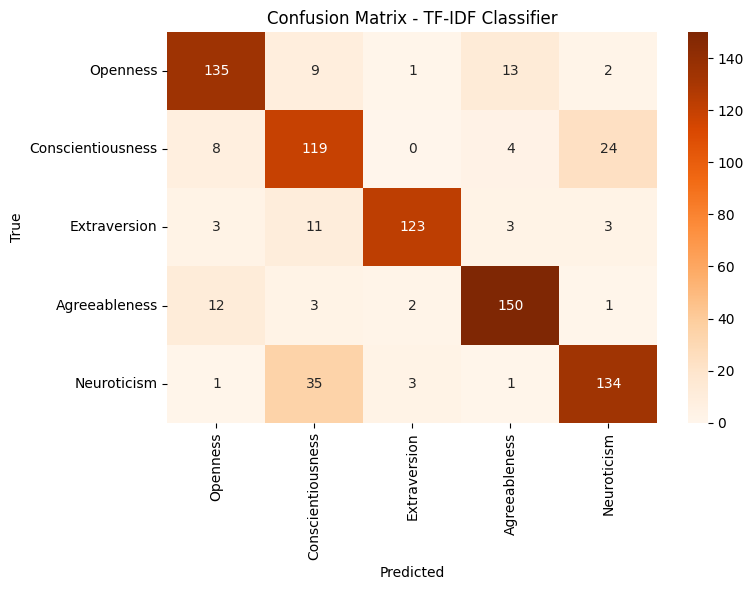

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_names = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - TF-IDF Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


In [ ]:
import os
import joblib

model_path=os.path.join(os.getcwd(),'../models/TF-IDF')

#save the model and the vectorizer
joblib.dump(clf, f"{model_path}/model.pkl")
joblib.dump(tfidf, f"{model_path}/vectorizer.pkl")